# E-commerce KPI Analysis

This notebook explores synthetic KPI data with controlled relationships.
The focus is on KPI tracking, scatter diagnostics, and simple regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("ecommerce_kpi.csv", parse_dates=["Date"])
df.head()

,Date,Marketing_Spend,Website_Visitors,Conversion_Rate,Orders,Revenue,Avg_Order_Value,Customer_Acquisition_Cost,Region
0,2024-02-15,10768.05,37323,0.0192,718,59400.83,85.13,36.01,East
1,2024-02-16,10645.00,36942,0.0188,694,57679.69,81.51,27.51,North
2,2024-02-17,9761.73,33506,0.0152,510,36766.11,68.38,34.49,East
3,2024-02-18,9856.48,35680,0.0205,733,54200.85,73.12,23.75,East
4,2024-02-19,8758.45,28452,0.0184,524,37129.62,68.87,31.06,West


## Core KPIs

In [4]:
total_revenue = df["Revenue"].sum()
total_orders = df["Orders"].sum()
avg_conversion = df["Conversion_Rate"].mean()
total_spend = df["Marketing_Spend"].sum()
avg_aov = df["Avg_Order_Value"].mean()

kpis = pd.DataFrame({
    "KPI": ["Total Revenue", "Total Orders", "Avg Conversion Rate", "Total Marketing Spend", "Avg Order Value"],
    "Value": [total_revenue, total_orders, avg_conversion, total_spend, avg_aov],
})
kpis

,KPI,Value
0,Total Revenue,3.237053e+07
1,Total Orders,4.359330e+05
2,Avg Conversion Rate,1.827548e-02
3,Total Marketing Spend,6.923601e+06
4,Avg Order Value,7.391595e+01


## Trend View

C:\Users\Admin\AppData\Local\Temp\ipykernel_29060\2777602355.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index("Date").resample("M").sum(numeric_only=True)


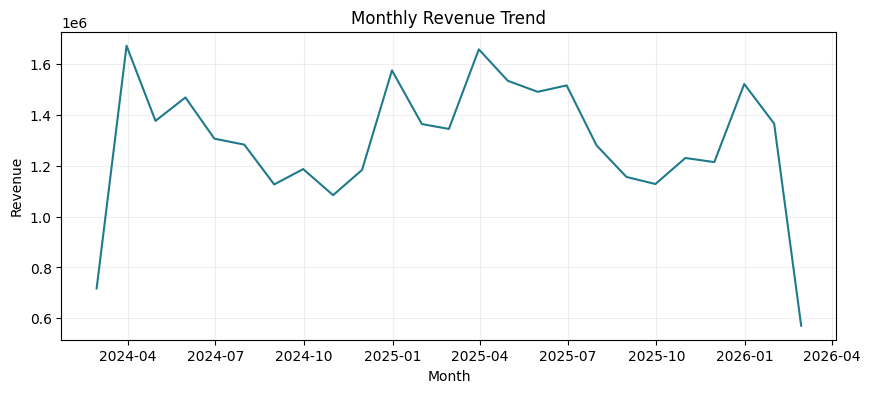

In [5]:
monthly = df.set_index("Date").resample("M").sum(numeric_only=True)
plt.figure(figsize=(10, 4))
plt.plot(monthly.index, monthly["Revenue"], color="#1f7a8c")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(alpha=0.2)
plt.show()

## Scatter + Regression

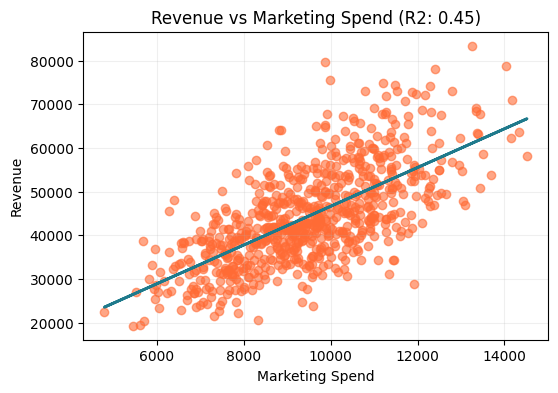

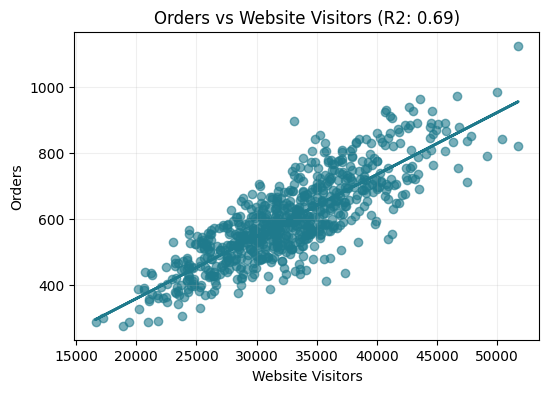

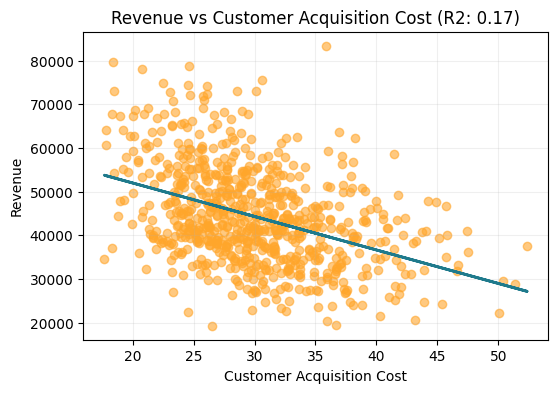

,Relationship,R2
0,Spend vs Revenue,0.447014
1,Visitors vs Orders,0.686282
2,CAC vs Revenue,0.166493


In [6]:
def scatter_with_regression(x, y, x_label, y_label, color="#ff6b35"):
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.6, color=color)
    plt.plot(x, y_pred, color="#1f7a8c", linewidth=2)
    plt.title(f"{y_label} vs {x_label} (R2: {r2:.2f})")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha=0.2)
    plt.show()

    return r2

r2_spend = scatter_with_regression(
    df["Marketing_Spend"].values,
    df["Revenue"].values,
    "Marketing Spend",
    "Revenue",
)

r2_visitors = scatter_with_regression(
    df["Website_Visitors"].values,
    df["Orders"].values,
    "Website Visitors",
    "Orders",
    color="#1f7a8c",
)

r2_cac = scatter_with_regression(
    df["Customer_Acquisition_Cost"].values,
    df["Revenue"].values,
    "Customer Acquisition Cost",
    "Revenue",
    color="#ffa62b",
)

pd.DataFrame({
    "Relationship": ["Spend vs Revenue", "Visitors vs Orders", "CAC vs Revenue"],
    "R2": [r2_spend, r2_visitors, r2_cac],
})

## Region Segmentation

In [7]:
region_summary = df.groupby("Region").agg(
    revenue=("Revenue", "sum"),
    orders=("Orders", "sum"),
    avg_conversion=("Conversion_Rate", "mean"),
    avg_aov=("Avg_Order_Value", "mean"),
)
region_summary.sort_values(by="revenue", ascending=False)

,revenue,orders,avg_conversion,avg_aov
Region,,,,
North,9370340.34,126056,0.018128,74.257033
East,9222847.99,123144,0.018510,74.454216
West,6964553.32,90859,0.018953,76.045036
South,6812790.89,95874,0.017650,71.235955
